In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'

df = pd.read_csv(url)
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020-11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020-11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020-11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020-11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [29]:
#pandas profiling
import pandas_profiling
# from pandas_profiling import ProfileReport
#
# profile = ProfileReport(df).to_notebook_iframe()
# profile

In [30]:
df['month'] =pd.to_datetime(df['month']) # already done
df.info()
#
# df['month'].dt.month
#
# df['new_month'] = df['month'].dt.month
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      14575 non-null  datetime64[ns]
 1   state                      14575 non-null  object        
 2   permit                     14551 non-null  float64       
 3   permit_recheck             3190 non-null   float64       
 4   handgun                    14555 non-null  float64       
 5   long_gun                   14556 non-null  float64       
 6   other                      7590 non-null   float64       
 7   multiple                   14575 non-null  int64         
 8   admin                      14552 non-null  float64       
 9   prepawn_handgun            12632 non-null  float64       
 10  prepawn_long_gun           12630 non-null  float64       
 11  prepawn_other              7205 non-null   float64       
 12  rede

In [31]:
df['month'][0].year

2020

In [32]:
import calendar
{m: i for i, m in enumerate(calendar.month_abbr) if m}

{'Apr': 4,
 'Aug': 8,
 'Dec': 12,
 'Feb': 2,
 'Jan': 1,
 'Jul': 7,
 'Jun': 6,
 'Mar': 3,
 'May': 5,
 'Nov': 11,
 'Oct': 10,
 'Sep': 9}

In [33]:
def to_year(string):
    return string.year

def to_month(string):
    return string.month
df_new = df
df_new['year'] = df['month'].apply(to_year)
df_new['month'] = df['month'].apply(to_month)
df_new

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839,2020
1,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510,2020
2,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444,2020
3,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770,2020
4,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14571,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14572,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14573,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14575 non-null  int64  
 1   state                      14575 non-null  object 
 2   permit                     14551 non-null  float64
 3   permit_recheck             3190 non-null   float64
 4   handgun                    14555 non-null  float64
 5   long_gun                   14556 non-null  float64
 6   other                      7590 non-null   float64
 7   multiple                   14575 non-null  int64  
 8   admin                      14552 non-null  float64
 9   prepawn_handgun            12632 non-null  float64
 10  prepawn_long_gun           12630 non-null  float64
 11  prepawn_other              7205 non-null   float64
 12  redemption_handgun         12635 non-null  float64
 13  redemption_long_gun        12634 non-null  flo

In [35]:
# create a list of columns
column_list = df.columns.tolist()
df_new = df_new[['year',
    'month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']]

In [36]:
df_new

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       14575 non-null  int64  
 1   month                      14575 non-null  int64  
 2   state                      14575 non-null  object 
 3   permit                     14551 non-null  float64
 4   permit_recheck             3190 non-null   float64
 5   handgun                    14555 non-null  float64
 6   long_gun                   14556 non-null  float64
 7   other                      7590 non-null   float64
 8   multiple                   14575 non-null  int64  
 9   admin                      14552 non-null  float64
 10  prepawn_handgun            12632 non-null  float64
 11  prepawn_long_gun           12630 non-null  float64
 12  prepawn_other              7205 non-null   float64
 13  redemption_handgun         12635 non-null  flo

In [23]:
# change the month from integer to string
import calendar

def month_int_to_str(integer):
    return calendar.month_name[integer]

df_new['month'] = df_new['month'].apply(month_int_to_str)

In [24]:
df_new_pivot_2019 = df_new[['year', 'month', 'state', 'totals']]

df_new_pivot_2019 = df_new_pivot_2019[df_new_pivot_2019['year'] == 2019]
# df_new_pivot_2019
df_new_pivot_2019 = df_new_pivot_2019[['state', 'totals','year', 'month']]
df_new_pivot_2019

,state,totals,year,month
605,Alabama,100100,2019,December
606,Alaska,7840,2019,December
607,Arizona,38171,2019,December
608,Arkansas,25699,2019,December
609,California,106600,2019,December
...,...,...,...,...
1260,Virginia,37857,2019,January
1261,Washington,56051,2019,January
1262,West Virginia,15320,2019,January
1263,Wisconsin,34545,2019,January


In [25]:
# converting the df_new dataframe to a pivot but
# this does not work since it has a lot of NaN values
# therefore commenting this section out.
# df_new_pivot = df_new.pivot(index=['year', 'state'], columns='month', values= 'totals')
# df_new_pivot
# df_new_pivot.dropna()
## plotting the heatmap from 1999-2020 (not good)
# import seaborn as sns
# ax = sns.heatmap(df_new_pivot)
# plt.bar(df_new_pivot)

In [26]:
df_new_pivot_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 605 to 1264
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   660 non-null    object
 1   totals  660 non-null    int64 
 2   year    660 non-null    int64 
 3   month   660 non-null    object
dtypes: int64(2), object(2)
memory usage: 25.8+ KB


In [12]:
df_new_pivot_2019_pivot = df_new_pivot_2019.pivot(index='state', columns='month', values= 'totals')
df_new_pivot_2019_pivot
# #get the list of columns to sort the columns properly
df_new_pivot_2019_pivot.columns.tolist()
df_new_pivot_2019_pivot = df_new_pivot_2019_pivot[['January','February','March','April','May','June','July','August',
 'September','October','November','December']]
df_new_pivot_2019_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
state,,,,,,,,,,,,
Alabama,44989,46203,51923,41146,43908,42898,51757,69377,56872,63254,77657,100100
Alaska,4582,5233,7136,6505,6376,5557,5298,6796,6106,8281,7213,7840
Arizona,29039,32776,37340,30222,28950,26746,26325,33851,29307,28833,31352,38171
Arkansas,17258,20289,22246,15812,15317,13956,13684,18303,16285,19303,23192,25699
California,98502,96970,123056,114466,111816,115987,89532,99146,95540,96252,92765,106600
Colorado,38491,40467,46915,39433,36814,34773,33812,38755,35333,37564,39682,47496
Connecticut,16324,15040,18362,15726,14737,14041,13362,13326,12365,12574,13789,13289
Delaware,4119,3682,4985,3807,3694,3204,2873,3547,3356,3982,4258,4920
District of Columbia,360,364,417,409,417,305,375,386,610,933,595,755


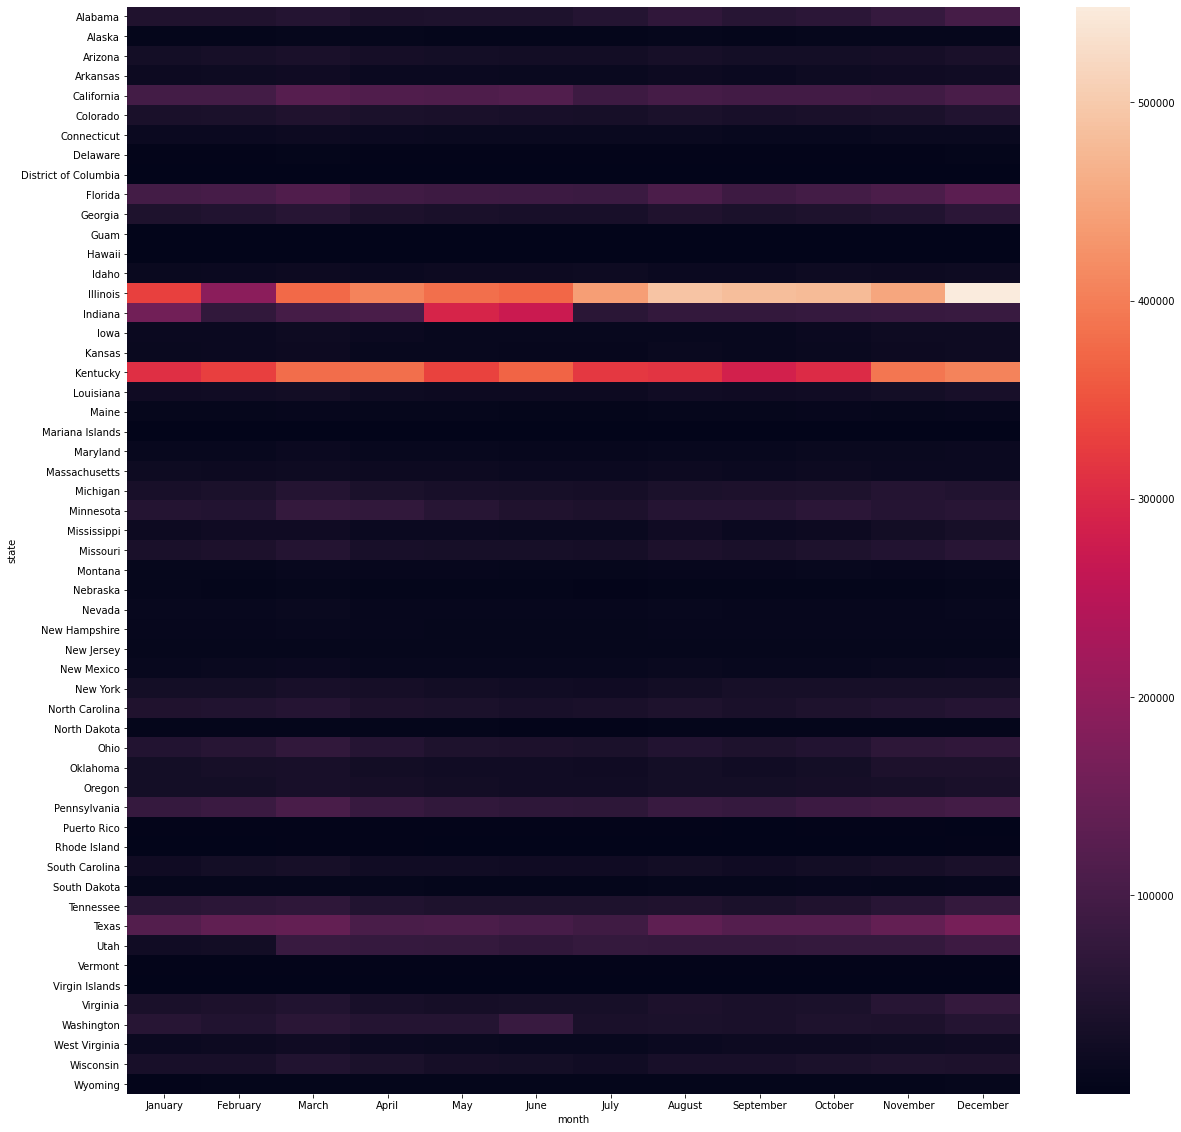

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.heatmap(df_new_pivot_2019_pivot)

In [ ]:
df_new_pivot_2019_pivot['total'] = 0
df_new_pivot_2019_pivot['total'] = df_new_pivot_2019_pivot.iloc[:,-13:-1].sum(axis = 1)

#to bring the index back as a column
df_new_pivot_2019_pivot = df_new_pivot_2019_pivot.reset_index()
df_new_pivot_2019_pivot

month,state,January,February,March,April,May,June,July,August,September,October,November,December,total
0,Alabama,44989,46203,51923,41146,43908,42898,51757,69377,56872,63254,77657,100100,690084
1,Alaska,4582,5233,7136,6505,6376,5557,5298,6796,6106,8281,7213,7840,76923
2,Arizona,29039,32776,37340,30222,28950,26746,26325,33851,29307,28833,31352,38171,372912
3,Arkansas,17258,20289,22246,15812,15317,13956,13684,18303,16285,19303,23192,25699,221344
4,California,98502,96970,123056,114466,111816,115987,89532,99146,95540,96252,92765,106600,1240632
5,Colorado,38491,40467,46915,39433,36814,34773,33812,38755,35333,37564,39682,47496,469535
6,Connecticut,16324,15040,18362,15726,14737,14041,13362,13326,12365,12574,13789,13289,172935
7,Delaware,4119,3682,4985,3807,3694,3204,2873,3547,3356,3982,4258,4920,46427
8,District of Columbia,360,364,417,409,417,305,375,386,610,933,595,755,5926
9,Florida,97486,101991,114001,93693,88204,85730,84024,107318,89815,97214,107274,128789,1195539


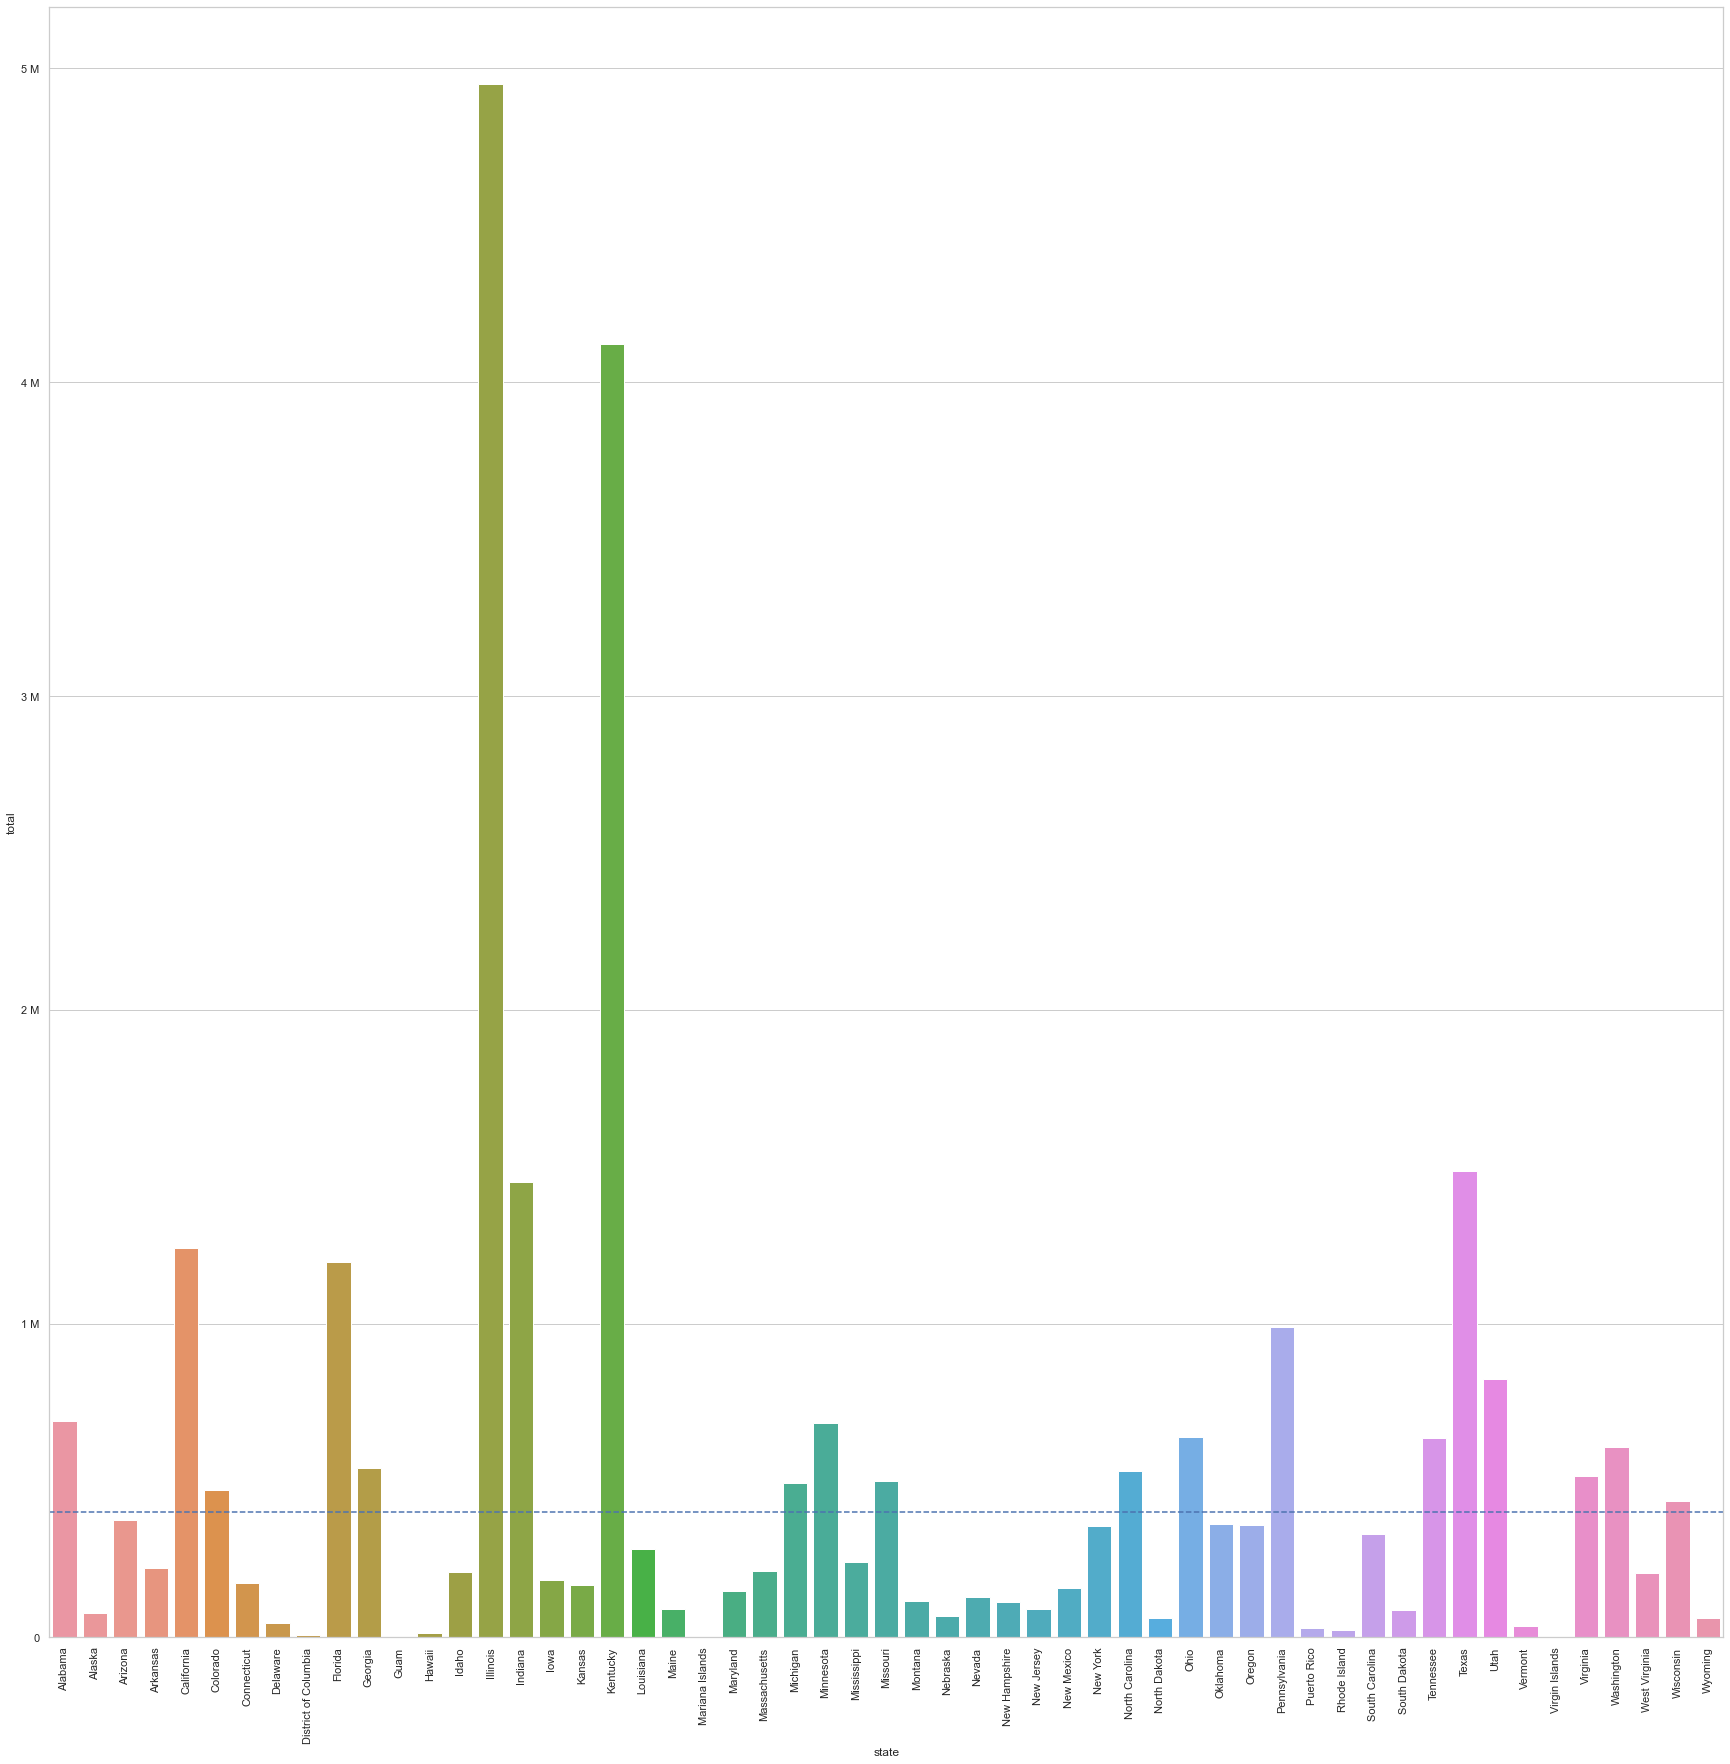

In [ ]:
# #plotting histogram
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax1.hist(df_new_pivot_2019['totals'], bins=100)
# ax1.plot()

#plotting bar plot to see the states annual buying
fig, ax1 = plt.subplots(figsize = (30, 30))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_new_pivot_2019_pivot['state'], y = df_new_pivot_2019_pivot['total'])
# rotating the states names to display more beautifully
plt.xticks(rotation = 90)
# adding a new dashed line to set a threshold of arms buying
ax.axhline(400000, ls='--')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()


In [ ]:
#filtering the top 20 states only to help with the values
df_2019_pivot_1M = df_new_pivot_2019_pivot[df_new_pivot_2019_pivot['total'] > 1000000]
df_2019_pivot_1M.shape
df_2019_pivot_1M

month,state,January,February,March,April,May,June,July,August,September,October,November,December,total
4,California,98502,96970,123056,114466,111816,115987,89532,99146,95540,96252,92765,106600,1240632
9,Florida,97486,101991,114001,93693,88204,85730,84024,107318,89815,97214,107274,128789,1195539
14,Illinois,331325,190886,376018,405464,381771,373166,439458,491715,483162,478329,450084,548192,4949570
15,Indiana,160140,71892,98597,106096,292587,273660,61139,74022,72951,77713,80002,81766,1450565
18,Kentucky,308573,328572,379268,381411,332076,369622,319270,315348,286064,303650,391747,405291,4120892
46,Texas,119902,135931,141056,106112,107763,101762,91183,133647,121718,121299,140598,166241,1487212


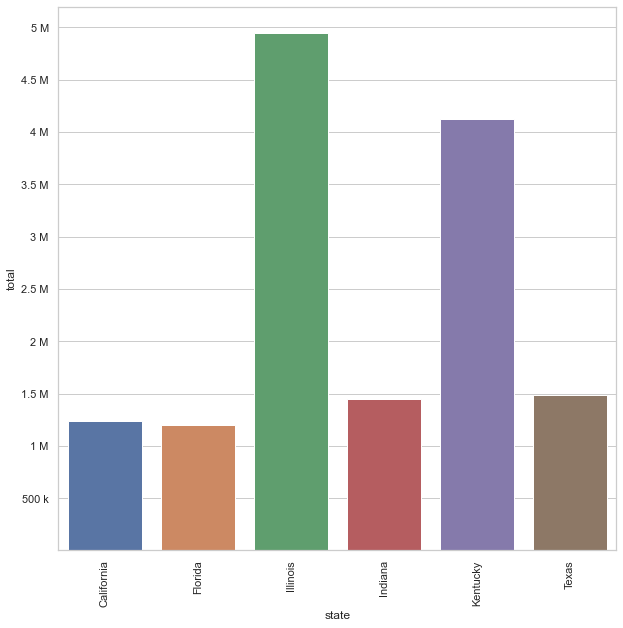

In [ ]:
#plotting bar plot to see the states annual buying with more than 600k
fig, ax1 = plt.subplots(figsize = (10, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_2019_pivot_1M['state'], y = df_2019_pivot_1M['total'])
# rotating the states names to display more beautifully
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000])
plt.show()

In [ ]:
df_new1 = df_new[['year', 'month', 'state', 'totals']]
df_new1
# df_new1.pivot(index='state', columns = 'year', values = 'totals')
# type(df_new1['year'])

df_annual_data_bystate = pd.pivot_table(df_new1, index = ['state','year'], values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

In [ ]:
df_annual_data_bystate
# df_annual_data[df_annual_data['state'] == 'Mariana Islands']

,state,year,totals
0,Alabama,1998,36568
1,Alabama,1999,246756
2,Alabama,2000,221911
3,Alabama,2001,230187
4,Alabama,2002,221008
...,...,...,...
1260,Wyoming,2016,63594
1261,Wyoming,2017,54711
1262,Wyoming,2018,60150
1263,Wyoming,2019,61291


In [ ]:
df_annual_data = pd.pivot_table(df_annual_data_bystate, index = 'year', values= 'totals', aggfunc= 'sum')
df_annual_data = df_annual_data.reset_index()

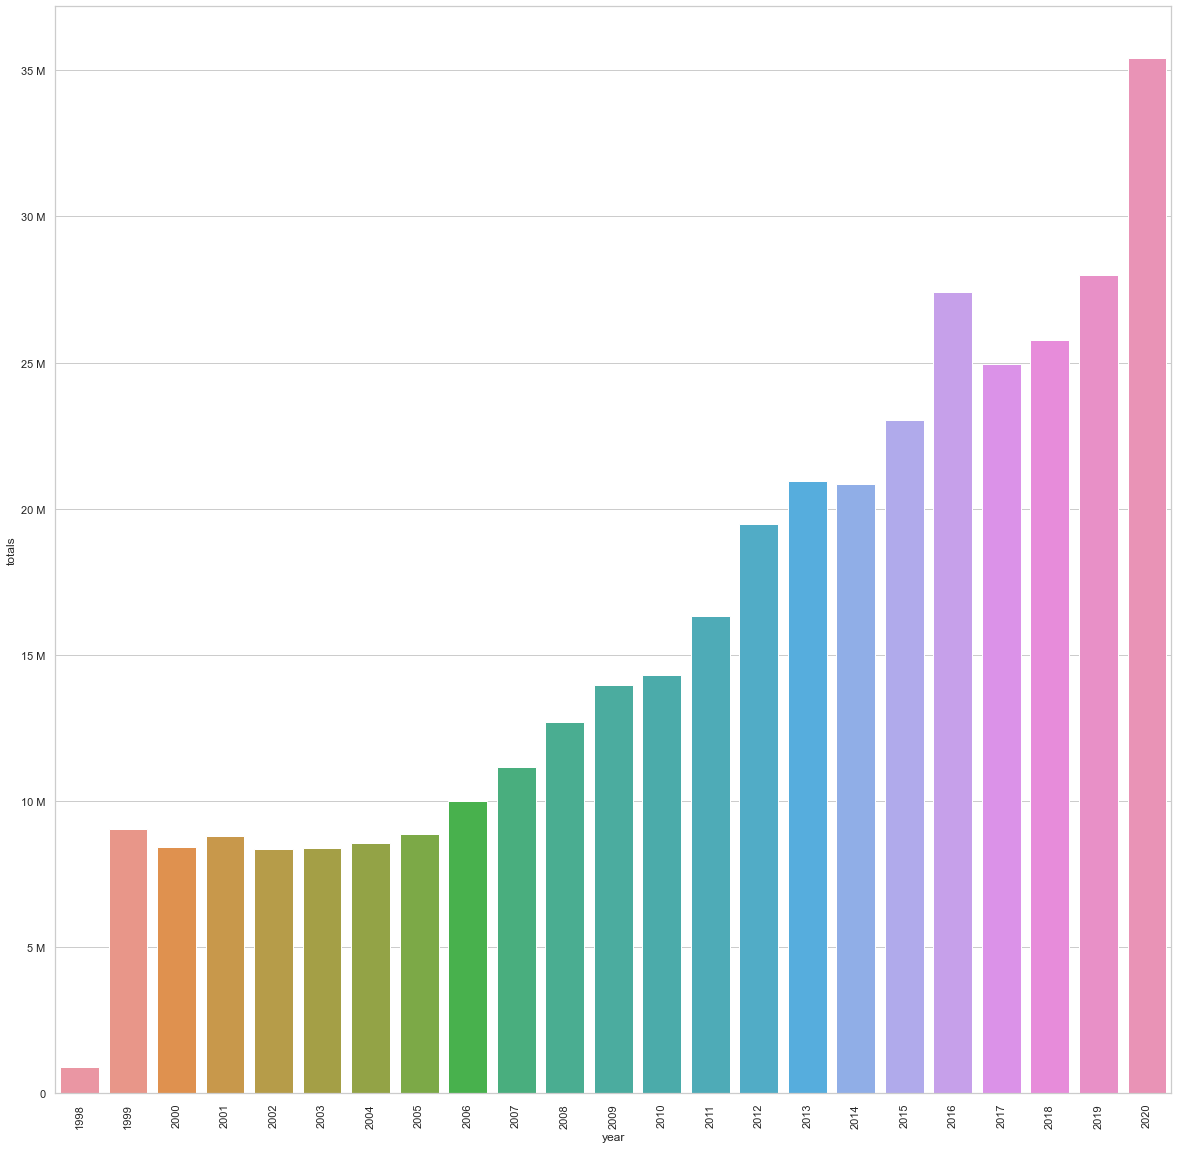

In [ ]:
fig, ax1 = plt.subplots(figsize = (20, 20))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_annual_data['year'], y = df_annual_data['totals'])
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig("annual_data.png")